**Вопрос 1**
Менеджер дал задачу “посмотреть, как там дела с ретеншном” и ускакал в отпуск (вот гад). Требуется попробовать как-то ответить на вопрос на основе таблички test_data_1.
Ответ нужен в виде небольшого отчёта в Jupyter (отправить можно в виде pdf/html/ipynb).
В отчёте приветствуются комментарии/вопросы вида “что ещё хотелось бы посмотреть”, “как можно уточнить постановку задачи”, всякое такое.


Retention — это маркетинговая метрика, которая показывает процент вернувшихся клиентов. Формула R = A/В , где А - количество активных пользователей в вс елдующем месяце из когорты предыдущего, В - количество клиентов за предыдущийм период.

**Пред обработка**: преобразование столбца data в формат даты, проверить пропущенные значения.

**Прототип решения**  
Расчет ретеншн:
1)определить первый и послдений заказ каждого клиента    
2) посчитать количество заказов за месяц


**Решение**  
Преобразуем данные для подготовки к анализу:

In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_excel(next(iter(uploaded.values())))
data.head()

,client_id,order_date,order_price,city_id
0,43000,2022-01-08 00:00:00,9250,2
1,43001,2022-01-14 00:00:00,8000,3
2,43002,2022-01-03 00:00:00,4550,1
3,43003,2022-01-14 00:00:00,3550,2
4,43004,2022-01-26 00:00:00,7700,3


In [8]:
len(data)

10926

In [14]:
data['order_date'].agg(['min','max'])

min    2022-01-01 00:00:00
max    2022-10-31 00:00:00
Name: order_date, dtype: object

In [13]:
data.dtypes

client_id       int64
order_date     object
order_price     int64
city_id         int64
dtype: object

In [21]:
data['order_date'] = pd.to_datetime(data['order_date'])
print(data['order_date'])

0       2022-01-08
1       2022-01-14
2       2022-01-03
3       2022-01-14
4       2022-01-26
           ...    
10921   2022-10-29
10922   2022-10-23
10923   2022-10-13
10924   2022-10-12
10925   2022-10-23
Name: order_date, Length: 10926, dtype: datetime64[ns]


In [36]:
data['order_month'] = data['order_date'].dt.to_period('M')
#data['order_month'] = data['order_date'].to_numpy().astype('datetime64[M]')
print(data['order_month'])

0        2022-01
1        2022-01
2        2022-01
3        2022-01
4        2022-01
          ...   
10921    2022-10
10922    2022-10
10923    2022-10
10924    2022-10
10925    2022-10
Name: order_month, Length: 10926, dtype: period[M]


In [28]:
data.groupby(['order_month'])['client_id'].agg(['count','unique'])

,count,unique
order_month,,
2022-01-01,1084,"[43000, 43001, 43002, 43003, 43004, 43005, 430..."
2022-02-01,1141,"[43004, 43015, 43024, 43028, 43030, 43031, 430..."
2022-03-01,1234,"[43008, 43053, 43065, 43074, 43138, 43167, 431..."
2022-04-01,1166,"[43172, 43202, 43277, 43323, 43366, 43496, 435..."
2022-05-01,1093,"[44009, 44369, 44535, 45004, 45014, 45036, 450..."
2022-06-01,1035,"[45003, 45016, 45444, 45651, 45709, 45864, 459..."
2022-07-01,1061,"[46123, 46215, 46574, 47066, 47082, 47093, 471..."
2022-08-01,1064,"[47503, 47827, 48021, 48033, 48034, 48048, 481..."
2022-09-01,1014,"[48331, 48364, 48568, 49021, 49022, 49036, 491..."


Saving test_data_1.xlsx to test_data_1 (6).xlsx


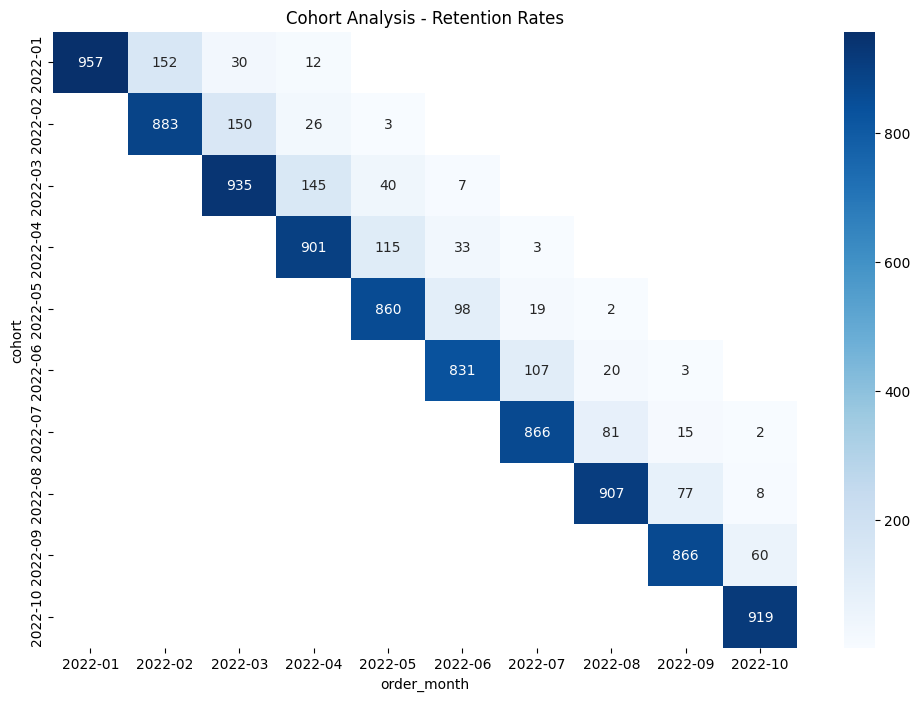

In [44]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

data = pd.read_excel(next(iter(uploaded.values())))
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_month'] = data['order_date'].dt.to_period('M')
data['cohort'] = data.groupby('client_id')['order_date'].transform('min').dt.to_period('M')

#построение когортного анализа
cohort_data = data.groupby(['cohort', 'order_month']).agg(n_clients=('client_id', 'nunique')).reset_index()
cohort_pivot = cohort_data.pivot_table(index='cohort', columns='order_month', values='n_clients')
#построение графика показывающего сколько клиентов, возвращаются в последующие месяцы в виде тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Cohort Analysis - Retention Rates')
plt.show()

**Вывод**   
Из графика видно что значения в строках быстро уменьшается, что указывает на то что большинство клиентов не возвращаются полсе первого месяца.
Январская когорта: пришло 957 клиентов, в феврале осталось 152 (15,8%), в марте - 30(3,1%).
После анализа такого графика можно придумать стратегии удержания клиентов.


**Итог** на задание ушло около 1,5 часа.

**Вопрос 2**   
В test_data_2 лежат какие-то бинарные вектора. Определите, сколько в них кластеров. Попробуйте как-то описать получившееся кластеры.


1.   загрузим данные
2.   применим Kmeans (k-средних)
3.   определим количество калстеров




In [49]:
#1
import pandas as pd

# Загрузить данные
uploaded = files.upload()
data = pd.read_excel(next(iter(uploaded.values())))

data.head()

Saving test_data_2.xlsx to test_data_2 (3).xlsx


,0,1,2,3,4,5,6
0,0,1,0,1,1,1,0
1,0,1,0,0,1,0,1
2,0,1,0,0,1,0,0
3,0,0,1,0,1,1,0
4,0,0,0,1,1,0,1


приведу название столбцов к строковому виду

In [62]:
data.columns = data.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

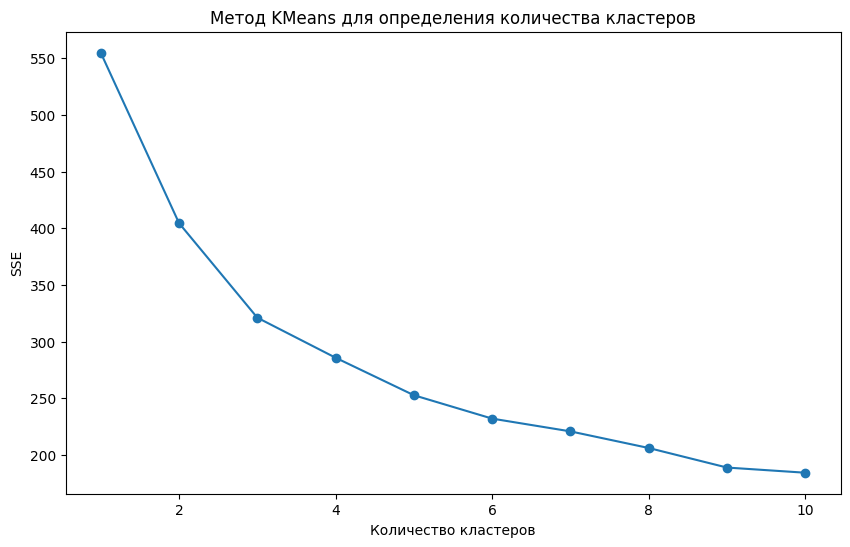

In [73]:
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1)
    sse = [] #сумма квадратов ошибок или качсетво кластеризации в Kmeans
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('SSE')
    plt.title('Метод KMeans для определения количества кластеров')
    plt.show()

find_optimal_clusters(data, 10)


выберем оптимальное количество калстеров

In [71]:
optimal_clusters = 3  # Пример, нужно выбрать на основе графика локтя
kmeans = KMeans(n_clusters=optimal_clusters)
data['cluster'] = kmeans.fit_predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [74]:
cluster_description = data.groupby('cluster').mean()
cluster_description

,0,1,2,3,4,5,6
cluster,,,,,,,
0,0.265823,0.329114,0.544304,0.721519,0.481013,0.987342,0.405063
1,0.500000,0.686275,0.205882,0.509804,0.676471,0.264706,0.617647
2,0.813559,0.338983,1.000000,0.237288,0.305085,0.084746,0.186441


**вывод**   
кластер 0 имеет высокое значение по
признакам 3 и 5.    
кластер 1 имеет высокое значение по признакам 1, 4, 6.   
клстер 2 имеет высокое знаечение по признакам 0, 2.
"высокое значение" - значит большинство элементов в этом кластере имеет значение = 1.

**задание 3**  
В test_data_3 содержатся результаты некоторого измерения, имеющего вид z = (a+x) ^ (b+y) + eps.
a, b – действительные числа между 1 и 10
eps – небольшой шум из Uniform(0,0.1)
^ – степень, не xor =)
Вычислите a и b.


для нахождения этих параметров можно использовать метод нелинейной регрессии

In [75]:
from google.colab import files
import pandas as pd

# Загрузка данных
uploaded = files.upload()
data = pd.read_excel(next(iter(uploaded.values())))

data.head()

Saving test_data_3.xlsx to test_data_3.xlsx


,x,y,z
0,0.906997,0.508163,90.796488
1,0.414474,0.146153,37.823019
2,0.257263,0.964007,90.243367
3,0.301285,0.628279,62.538480
4,0.520236,0.994226,123.466112


In [85]:
import numpy as np
from scipy.optimize import curve_fit
def model(X, a, b): # Функция для модели
    x, y = X
    return (a + x) ** (b + y)

X = data[['x', 'y']].values.T
z = data['z'].values

# Найдем параметры a и b
params, covariance = curve_fit(model, X, z, p0=initial_guess)

a, b = params

print(f'Найденные параметры: a = {a}, b = {b}')

Найденные параметры: a = 3.1417262098418623, b = 2.7163457197837007


также можно оценить качество модели и  полученные параметры.

**Вопрос 4**   
На голубом вертолёте прилетел волшебник и подарил миллион рублей (после уплаты налогов) на счёте в Сбербанке. Забрать их со счёта можно через год. До того можете пользоваться депозитами, накопительными счетами, инвестиционными инструментами. Что будете делать?


Наверное, тут следует выбрать оптимальную стратегию. Мы знаем, что заработать на накопительном счете не особо получится и мы скорее всего выйдем только в 0 из-за инфляции. Инвестиции же дают доход, но риск всё потерять довльно высокий.   
Я бы сделал так: 500,000 (вклад не облагается налогом до 500к) поставил бы на депозит по сроку на год без возможномсти забрать деньги в любой момент, а только по истечения срока, чтобы увеличить процент.
Остальную часть распределил по разным акциям, ценным бумагам и фондам, при этом до этого проанализировал бы рынок и распределил деньги по наилучшей стратегии в зависимости от рисков и процентов.    
Если все инвестиционные инструменты прогорят, будет обидно конечно (но и деньги упали с неба, а до этого я надеюсь у этого человека была финансовая подушка на черный день), в таком случае можно будет забрать наш вклад, с потерей процентов и жить на них.

**Вопрос 5**   
Известно, что немало работающих на человеческих факторах моделей (скоринг, ранжирование, рекомендашки) сочтут довольно полезными такие данные как национальность, цвет кожи, рост, вес, IQ. Но как-то будут и без них работать. Пусть вы как раз тюните модель, для которой такое поведение характерно, и соцдем-данные в принципе можно достать. Ваши действия?


Я думаю, что любые соц. данные могут помочь в разных сферах модели.
Из предложенных, например, данные по национальности и возрасту нужны для социально-правовой системы государства для разных субъктов РФ, может помочь собрать родословную в генбанках или понять почему например люди мигрируют из своего исторического региона. К IQ (коненчо можно придраться, что этот тест не отражает все аспекты интеллекта) можно взять для статистики "зависимость профессии от IQ".
 Но с нынешней повесткой некоторых стран, наверное учитывать некоторые данные нужно аккуратно и иметь в виду этические соображения, или при публикации использовать альтернативные данные.